In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

(60000, 28, 28)
(60000,)


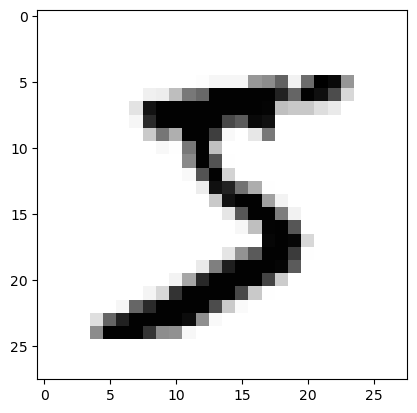

In [9]:
#loading MNIST
#most popular database, shows the capabilities
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#get a numpy array, always normalize the data, represent as float
x_train = x_train/255
x_test = x_test/255

#print(x_train) prints a huge vector
#print(y_train)

#60000 datapoints, 28x28 pixel arrays 1 dimensional arrays for 60000 labels
print(x_train.shape)
print(y_train.shape)

#visualize a single one of these images, then use cmap to display a greyscale image
plt.imshow(x_train[0], cmap="Greys") #we'll get a two dimensional object

In [19]:
#let's build a model of multinomial logistic regression, which means lineal transformation to data, from evidence to probabilities
#one layer, a dense layer, dense set of connections, takes all the values of input, makes linear transformation to give all the values of the output
#Dense(x, y, z) 
#x is the number of nodes in the network, or length of vectors it is producing
#y converts to vector of probabilities, 0-9
#z tells the model the size of the input
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    
    #we flatten our input, 28x28=784
    layers.Flatten(),
    layers.Dense(10, activation="softmax")   
    ])

#we compile to train the model how to find the optimizer and the loss
model_lr.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics =["accuracy"])

#model summary shows us how this model will look
model_lr.summary()

#output size will be none, because we dont really care about the batch size



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [21]:
#training the model with the one_hot label
#by fitting the model_lr we receive a value error due to the incompatibility of the shapes
#default batch size is 32, Shapes are (32, 1) and (32, 10) therefore being incompatible


#to work, we convert the training data into the same for to make it work
#onehot representation of 10 values
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

#even if the model is set right, the program will return a ValueError: creating variables on a non-first call to a function decorated with a tf.function, just restart the kernel, it's a tensorflow issue
#SHAPE MODELS SOMETIMES NEED A KERNEL RESTART

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9159


In [22]:
#change the way the model trains to fit the data
#this time we will use sparse_categorical_crossentropy

model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),

    layers.Flatten(),
    layers.Dense(10, activation="softmax")   
    ])

model_lr.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics =["accuracy"])

model_lr.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [23]:
#estimations of loss: 0.4728 and accuracy:0.8748
model_lr.fit(x_train, y_train)
#running again continues the training, in case we want to restart the training we redefine the model or change the coefficients 

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4728 - accuracy: 0.8748


In [26]:
#run 10 epochs with a set batch size and a validation splitter which takes a percentage of data to use it for validation processes 
model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.3)
#we can also expirement with validation data(x_test, y_test) to get from the training set

Epoch 1/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.9271 - val_loss: 0.2662 - val_accuracy: 0.9273
Epoch 2/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9283 - val_loss: 0.2653 - val_accuracy: 0.9272
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.9286 - val_loss: 0.2664 - val_accuracy: 0.9276
Epoch 4/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2534 - accuracy: 0.9290 - val_loss: 0.2673 - val_accuracy: 0.9281
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.9296 - val_loss: 0.2667 - val_accuracy: 0.9272
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.9298 - val_loss: 0.2683 - val_accuracy: 0.9273
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2487 - accuracy: 0.9301 - val_loss: 0.2673 - val_accuracy: 0.9278
Epoch 

In [28]:
#history of the data from our models
history_lr=model_lr.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test), verbose=False)

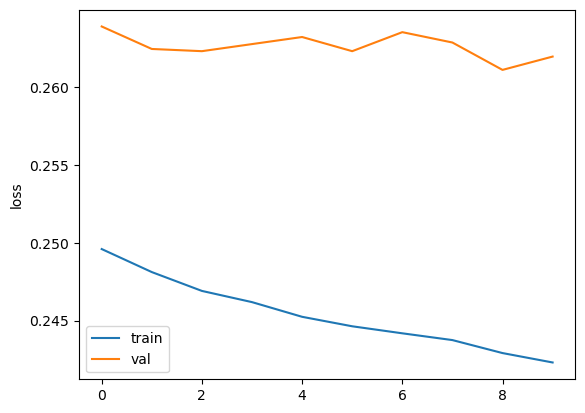

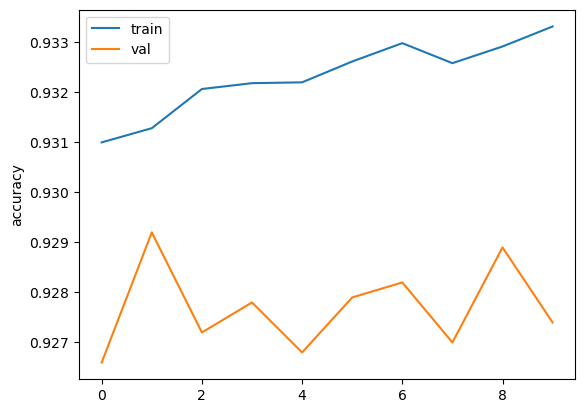

In [31]:
#To review the Training results we use the matplotlib library to help visualize the results

plt.plot(history_lr.history["loss"], label="train")
plt.plot(history_lr.history["val_loss"], label="val")
plt.ylabel("loss")
plt.legend()
plt.show()


plt.plot(history_lr.history["accuracy"], label="train")
plt.plot(history_lr.history["val_accuracy"], label="val")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [32]:
#test the model
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.9274


[0.2619765102863312, 0.9273999929428101]

1/1 [==============================] - 0s 24ms/step
[8.4542313e-07 1.8727162e-12 1.7661787e-06 3.9667180e-03 2.1995453e-07
 1.9761042e-05 8.2763128e-12 9.9575037e-01 1.1580879e-05 2.4883301e-04] -> 7


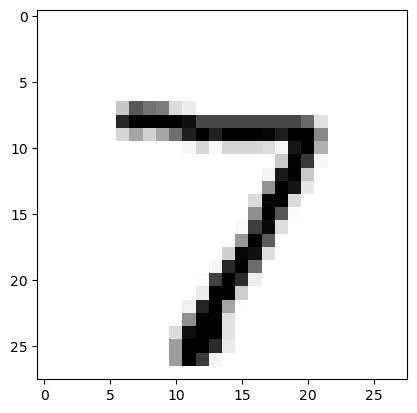

[1.1796800e-04 5.3193162e-06 9.9443573e-01 1.3449570e-04 4.7484244e-15
 1.7268024e-03 3.5426598e-03 5.4261704e-19 3.7147227e-05 4.5734007e-15] -> 2


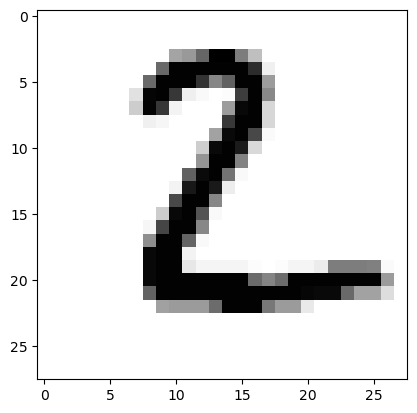

[1.03255195e-06 9.83129025e-01 9.74309538e-03 2.08742940e-03
 1.20534765e-04 6.95151452e-04 7.74081040e-04 3.94715986e-04
 2.85026082e-03 2.04659693e-04] -> 1


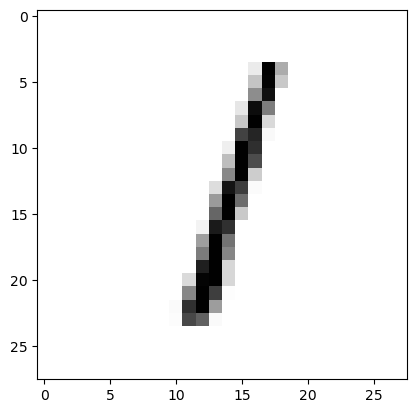

[9.9985766e-01 9.5015393e-12 3.2736123e-05 2.3730711e-06 2.2404684e-08
 2.9451683e-05 5.7434627e-05 7.1929690e-06 6.1687238e-06 6.9003590e-06] -> 0


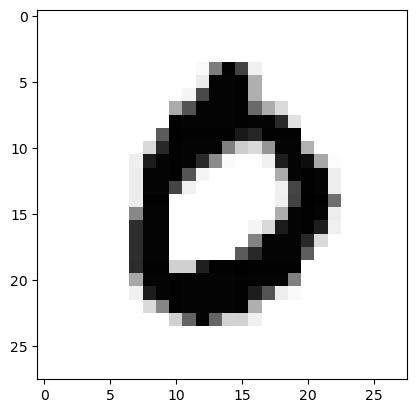

[3.6322148e-04 1.3254967e-07 1.3973239e-03 1.7685488e-05 9.6692061e-01
 7.6481680e-05 1.1956962e-03 2.3994439e-03 2.5997721e-03 2.5029607e-02] -> 4


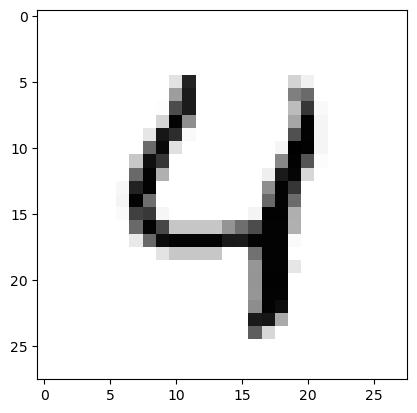

In [34]:
#presenting the raw results from the model for vectors of size 10
probs = model_lr.predict(x_test[:9])
#with highest value being 9.95750368e-01

#the predictions for the first axis
preds = np.argmax(probs, axis=1)

for i in range(5):
    print(probs[i], "->", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()